2: Implementing Feedforward neural networks with Keras and TensorFlow
<br>
a. Import the necessary packages
<br>
b. Load the training and testing data (MNIST/CIFAR10)
<br>
c. Define the network architecture using Keras
<br>
d. Train the model using SGD
<br>
e. Evaluate the network
<br>
f. Plot the training loss and accuracy
<br>

**datasets: MNIST, CIFER10**

#### a. Import the necessary packages

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [13]:
import os

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import keras

#### b. Load the training and testing data (MNIST/CIFAR10)

#### Note: Decrease batch size and remove some layers if epoch takes to much time to run

In [14]:
train_data_dir = '/home/comp124/Downloads/mnist-jpg/train'
test_data_dir = '/home/comp124/Downloads/mnist-jpg/test'

# Image data generator for training data
train_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Image data generator for testing data
test_datagen = ImageDataGenerator(
rescale=1.0/255
)

# Create data generators
train_batch_size = 10000
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=train_batch_size,
    class_mode='categorical', 
     color_mode='grayscale',# Use 'categorical' for one-hot encoded labels
    shuffle=True,
)

# Load test data without labels (class_mode=None)
test_batch_size = 2000
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(28, 28),  # Resize images to 28x28
    batch_size=test_batch_size,
    class_mode='categorical',  # Use 'categorical' for one-hot encoded labels
      color_mode='grayscale',
    shuffle=True,
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


#### Selecting first batch containing 10000 images 

In [15]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

#### c. Define the network architecture using Keras

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

#### d. Train the model using SGD

In [17]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))

Epoch 1/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.4414 - loss: 1.8938 - val_accuracy: 0.8250 - val_loss: 0.8834
Epoch 2/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8280 - loss: 0.8026 - val_accuracy: 0.8665 - val_loss: 0.5640
Epoch 3/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.8573 - loss: 0.5649 - val_accuracy: 0.8840 - val_loss: 0.4581
Epoch 4/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.8823 - loss: 0.4695 - val_accuracy: 0.8945 - val_loss: 0.3975
Epoch 5/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.8905 - loss: 0.4263 - val_accuracy: 0.9000 - val_loss: 0.3627
Epoch 6/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8957 - loss: 0.3851 - val_accuracy: 0.9055 - val_loss: 0.3390
Epoch 7/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.9053 - loss: 0.3534 - val_accuracy: 0.9055 - val_loss: 0.3212
Epoch 8/8
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.9065 - loss: 0.3378 - val_accu

#### e. Evaluate the network

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.8949 - loss: 0.3239
Loss:  0.30848410725593567
Accuracy:  0.9075000286102295


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
Actual Number:  6
Predicted Number:  4


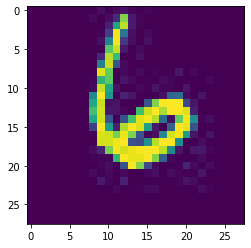

In [19]:
n = 20 
plt.imshow(x_test[n])
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

#### f. Plot the training loss and accuracy

In [20]:
history = history.history
history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

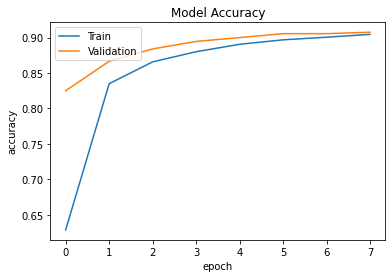

In [21]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', "Validation"], loc='upper left')

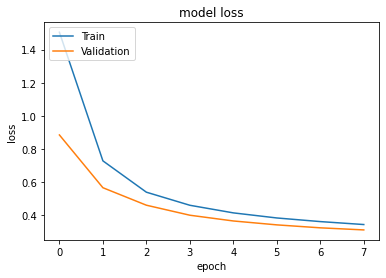

In [22]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

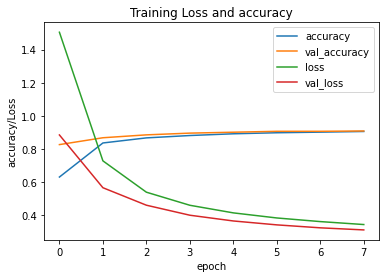

In [23]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])